In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import sparse
from skimage import transform

In [3]:
num_angles = 179
num_offsets = 1
num_spotxs = 130
chords = 'exact'
RSP_shape = [190, 1226]
MLP_angles_spotx = sparse.load_npz('../../Data/simple_pCT/FBP Comparison/MLP/MLP_angles{:d}_offset{:d}_spotx{:d}_{:s}_{:d}_{:d}.npz'.format(num_angles, num_offsets, num_spotxs, chords, RSP_shape[0], RSP_shape[1]))

In [4]:
rsp = np.load('../../Data/simple_pCT/Phantoms/Head/RSP.npy')

In [5]:
scale = 1
phantom = np.pad(rsp[:,:,rsp.shape[2]//2], ((30*scale,30*scale), (100*scale, 100*scale)))

phantom = transform.resize(phantom, RSP_shape)

x = phantom.flatten()

In [6]:
b_w = MLP_angles_spotx @ x
wepl = np.reshape(b_w, (num_spotxs, num_angles))

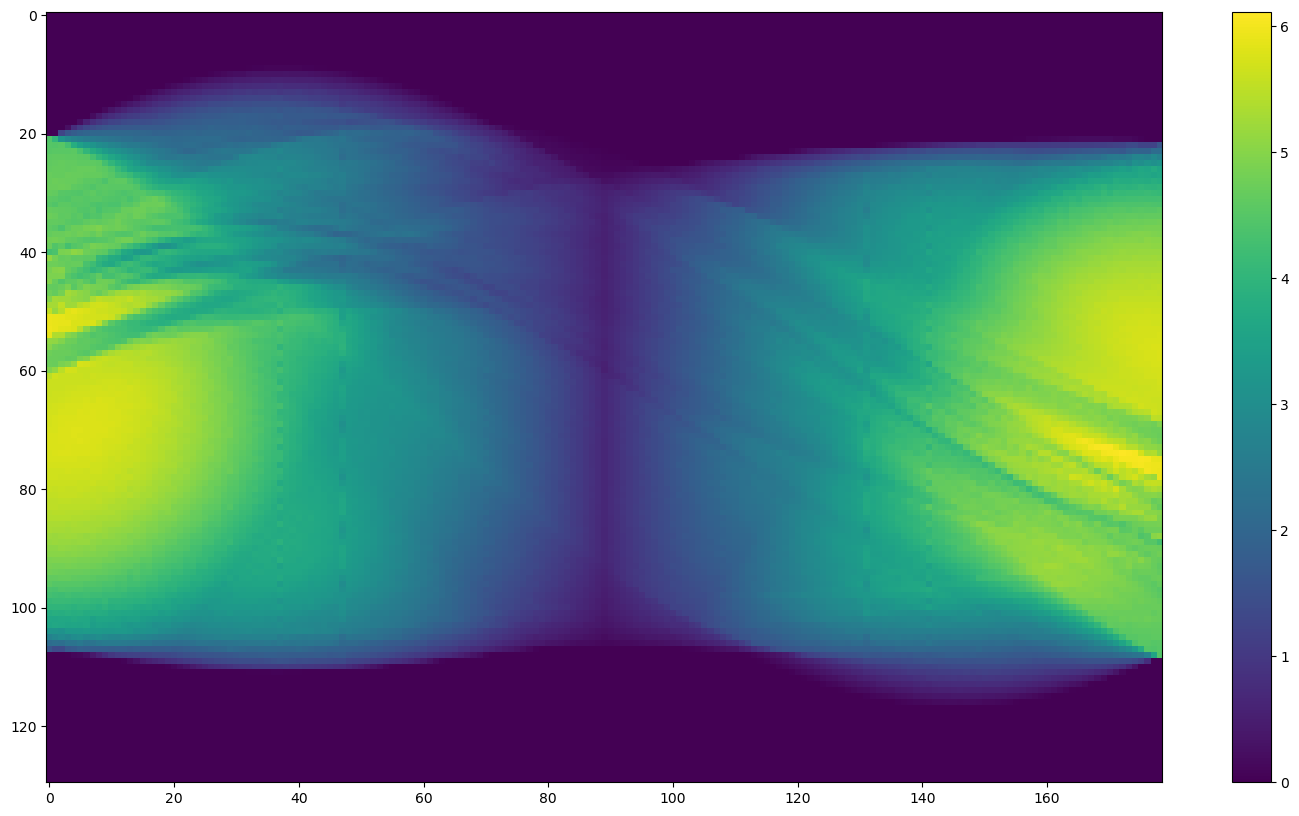

In [7]:
plt.figure(figsize=(18,10))
plt.imshow(wepl, aspect='auto')
plt.colorbar()
plt.show()

In [18]:
np.save('../../Data/simple_pCT/WEPL/WEPL_angles{:d}_offset{:d}_spotx{:d}_{:s}_{:d}_{:d}.npy'.format(num_angles, num_offsets, num_spotxs, chords, RSP_shape[0], RSP_shape[1]), wepl)